<a href="https://colab.research.google.com/github/martfem13/Data_Analysis-A1/blob/main/FORD_CAR_PREDICTION_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing Exploratory Data Analysis on our "ford" dataset which is a csv file.

In [ ]:
#imorting neccessary libraries/packages
import pandas as pd ## code is used to import the pandas library package
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
#reading the dataset
#we name our dataset dset as seen in the code below
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.shape

(17966, 9)

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

#Data Preprocessing Stage


###Phase1

In [ ]:
#Displaying the various data types in the dataframe
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
#Getting the number of unique values from all of the "object" data type
df.select_dtypes(include="object").nunique()

model           24
transmission     3
fuelType         5
dtype: int64

In [ ]:
#Getting the number of unique values from all of the "integer" data type
#df.select_dtypes(include="integer").nunique()

In [ ]:
#Getting the number of unique values from all of the "float" data type
df.select_dtypes(include="float").nunique()

mpg           90
engineSize    16
dtype: int64

Segment Model attribute into smaller number of unique value

In [ ]:
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [ ]:
df.isna()
#meaning there are no missing values so can proceed!

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
17961,False,False,False,False,False,False,False,False,False
17962,False,False,False,False,False,False,False,False,False
17963,False,False,False,False,False,False,False,False,False
17964,False,False,False,False,False,False,False,False,False


In [ ]:
def segment_model(model):
    if model.strip() == 'Fiesta' or model.strip() == 'Focus':
        return 'Compact Cars'
    elif 'Kuga' in model or 'EcoSport' in model:
        return 'Suvs'
    elif 'Tourneo' in model or 'S-Max' in model or 'B-max' in model:
        return 'Minivans'
    elif 'Galaxy' in model or 'Mustang' in model or 'Grand Tourneo Connect' in model:
        return 'Luxury Cars'
    elif 'Fusion' in model:
        return 'Mid -size Sedans'
    elif 'Ranger' in model:
        return 'Compact Pickup Trucks'
    else:
        return 'Other'

df['model'] = df['model'].apply(segment_model)

<Axes: >

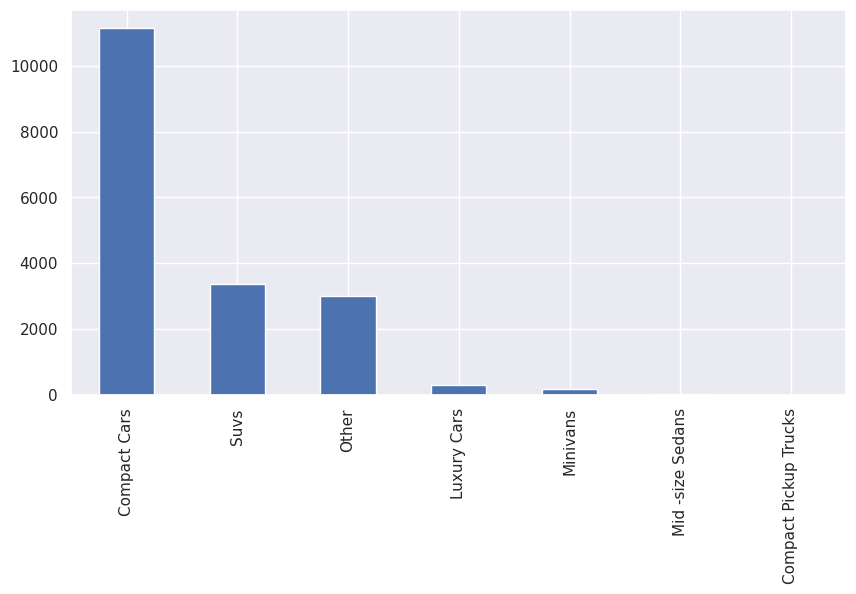

In [ ]:
plt.figure(figsize=(10,5))
df['model'].value_counts().plot(kind='bar')

#Exploratory Data Analysis
*library used (sns library)
*Using the sns library to create bar plots for our three categorical variable against the 'Price' column in the dataframe
*


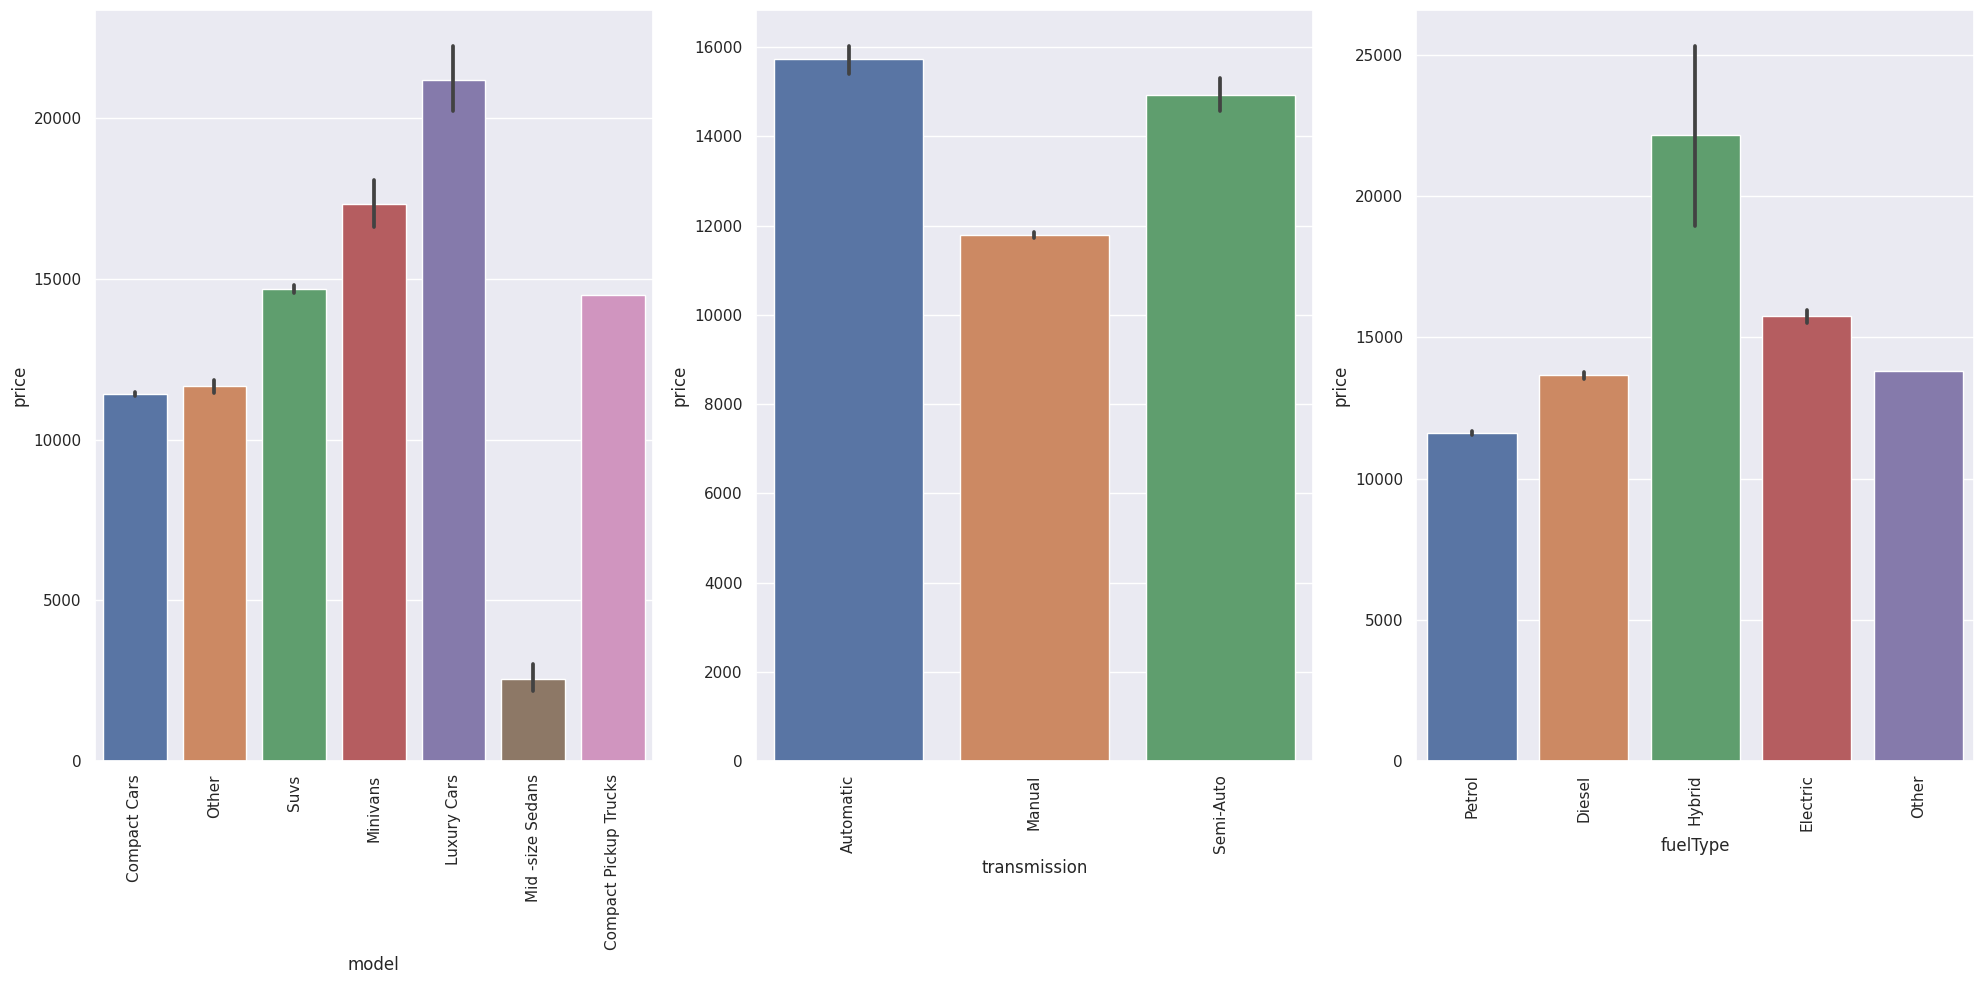

In [ ]:
# Plotting Categorical variables (model, transmission, fuelType)
cat_vars = ['model', 'transmission', 'fuelType']

# Creating subplots of figures to aid better visualization
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# Let us create a bar plot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Fix: Use axs[i] instead of axs[1]

fig.tight_layout()
plt.show()


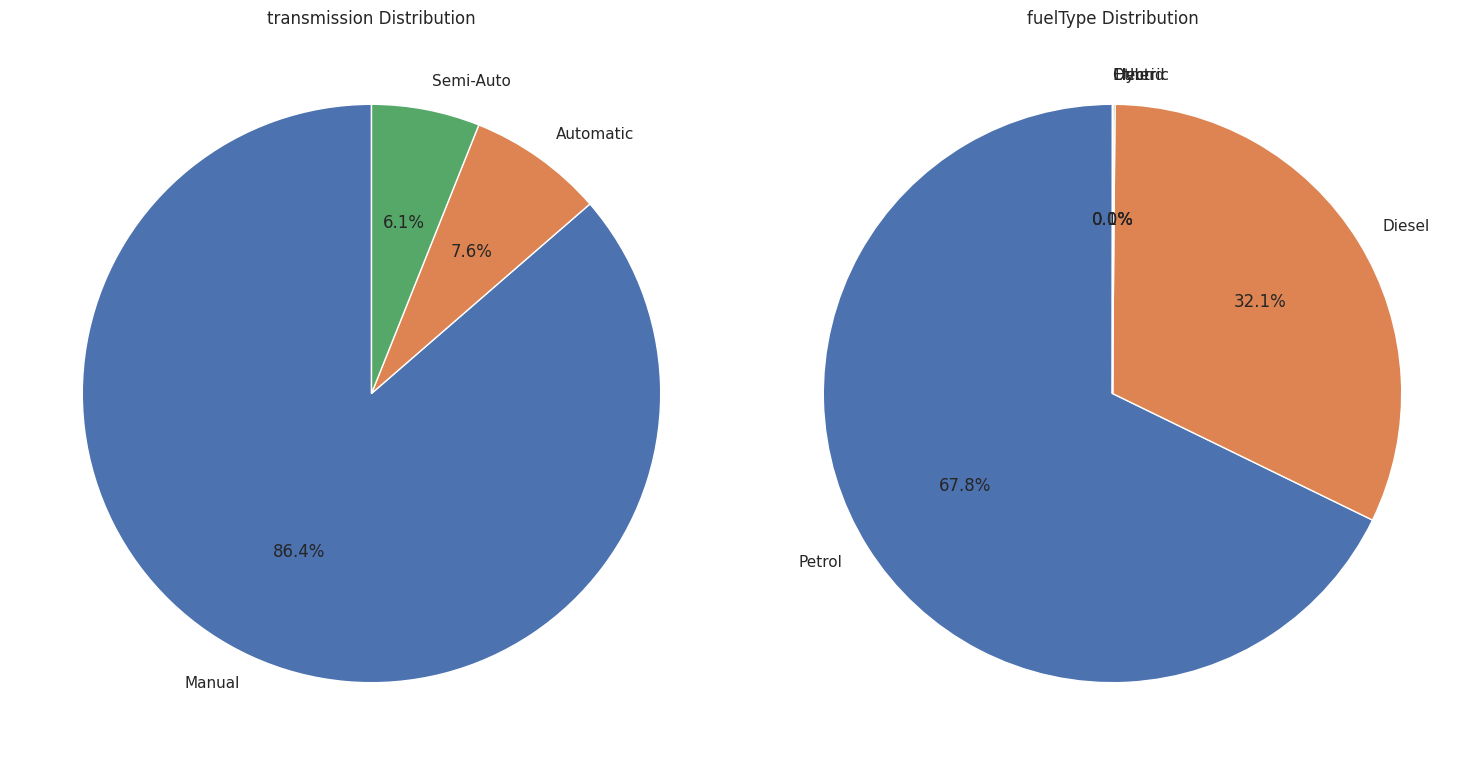

In [ ]:
cat_vars = ['transmission', 'fuelType']
#Create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
#Let us create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
  if 1 < len(axs.flat):
    #Let us see the number of occurencies for each categorical variable
    cat_counts = df[var].value_counts()


    #Creating a pie chart
    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    #set a title for each subplot
    axs.flat[i].set_title(f'{var} Distribution')


fig.tight_layout()
plt.show()


Checking for Outliers in the dataset

In [ ]:
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Compact Cars,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Compact Cars,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Compact Cars,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Compact Cars,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Compact Cars,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


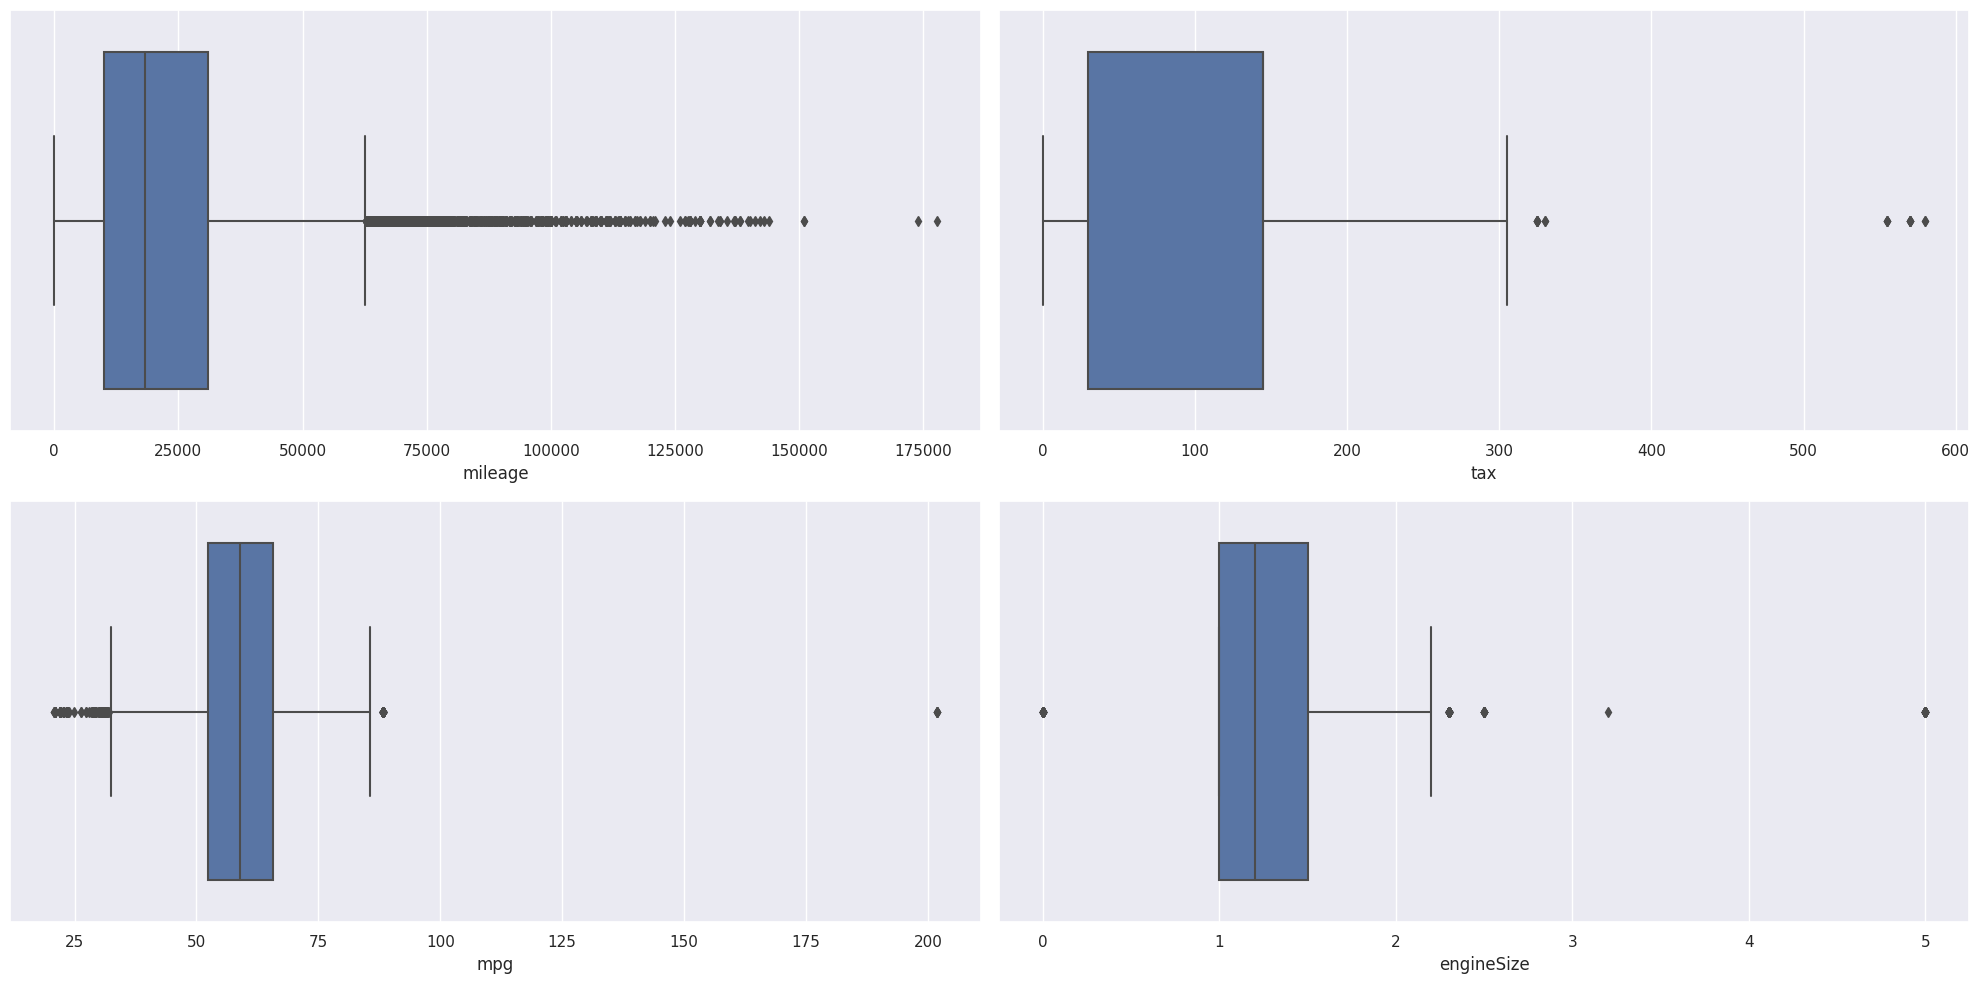

In [ ]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Let us create a box plot for each numerical variable
for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])  # Changed axs[1] to axs[i]

fig.tight_layout()
plt.show()


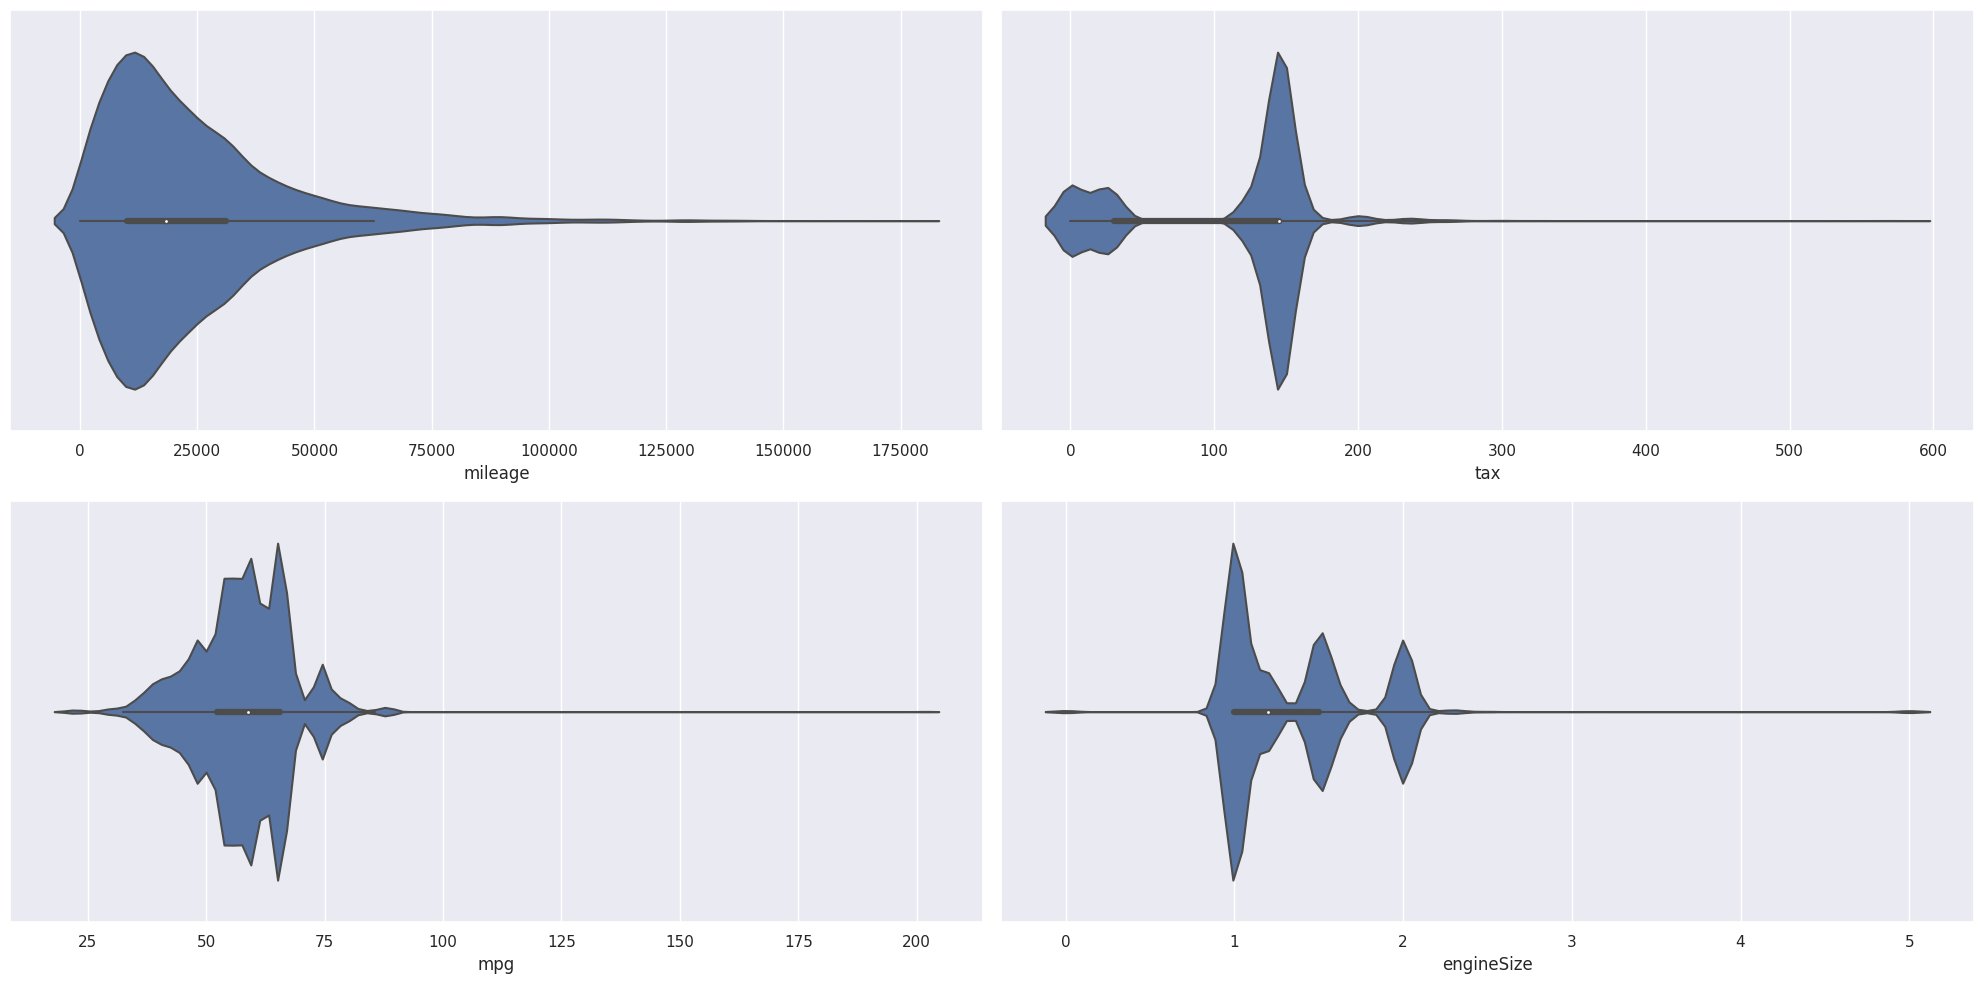

In [59]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data=df, ax=axs[i])


fig.tight_layout()
plt.show()